In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [2]:
data = pd.read_csv('play_by_play2019.csv.gz', compression = 'gzip', low_memory = False)

In [3]:
wentz = data.loc[(data.season_type == 'REG') & (data.posteam == 'PHI') & (data.passer == 'C.Wentz')]
all_qbs = data.loc[(data.season_type == 'REG') & (data['pass'] == 1) & (data.passer != 'C.Wentz')]

In [4]:
wentz = wentz.groupby(['pass_location','air_yards'], as_index= False).agg({ 'cpoe':'mean',
                                                                            'play_id':'count'})

all_qbs = all_qbs.groupby(['pass_location','air_yards'], as_index= False).agg({'cpoe':'mean',
                                                                                'play_id':'count'})


In [5]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
#pd.reset_option('max_columns')
#pd.reset_option('max_rows')
wentz = wentz.dropna()
all_qbs = all_qbs.dropna()

In [6]:
wentz.reset_index(drop=True, inplace=True)
all_qbs.reset_index(drop=True, inplace=True)

In [7]:
def define_location(col1,col2):
    if col1 == 'left':
        if col2 in range(-10,0):
            x = 0
        elif col2 in range(0,10):
            x = 1
        elif col2 in range(10,20):
            x = 2
        elif col2 in range(20,30):
            x = 3
        else:
            x = 4
    elif col1 == 'middle':
        if col2 in range(-10,0):
            x = 5
        elif col2 in range(-1,10):
            x = 6
        elif col2 in range(9,20):
            x = 7
        elif col2 in range(19,30):
            x = 8
        else:
            x = 9
    else:
        if col2 in range(-10,0):
            x = 10
        elif col2 in range(-1,10):
            x = 11
        elif col2 in range(9,20):
            x = 12
        elif col2 in range(19,30):
            x = 13
        else:
            x = 14
    return x

In [8]:
map_wentz = pd.DataFrame({'cpoe':0.0,'play_id' : 0},
                      index = range(15))

map_qbs = pd.DataFrame({'cpoe':0.0,'play_id' : 0,'passer' : 0},
                      index = range(15))

In [9]:
for i in range(0,len(wentz)):
    cell = (define_location(wentz.pass_location.iloc[i],wentz.air_yards.loc[i]))
    map_wentz.at[cell,'cpoe'] = map_wentz.cpoe.iloc[cell] + wentz.cpoe.iloc[i]
    map_wentz.at[cell,'play_id'] = map_wentz.play_id.iloc[cell] + wentz.play_id.iloc[i]
    
for i in range(0,len(all_qbs)):
    cell = (define_location(all_qbs.pass_location.iloc[i],all_qbs.air_yards.loc[i]))
    map_qbs.at[cell,'cpoe'] = map_qbs.cpoe.iloc[cell] + all_qbs.cpoe.iloc[i]
    map_qbs.at[cell,'play_id'] = map_qbs.play_id.iloc[cell] + all_qbs.play_id.iloc[i]

In [10]:
map_qbs

,cpoe,play_id,passer
0,86.359798,1109,0
1,0.210622,3089,0
2,17.159972,1282,0
3,3.851832,502,0
4,123.424941,311,0
5,61.809992,287,0
6,-14.802725,2285,0
7,17.959660,1095,0
8,-19.972637,205,0
9,-45.626175,195,0


In [11]:
wentz = map_wentz
all_qbs = map_qbs

In [12]:
wentz = wentz.assign(mean_cpoe = (wentz.cpoe)/(wentz.play_id))
all_qbs = all_qbs.assign(mean_cpoe = (all_qbs.cpoe)/(all_qbs.play_id))

In [13]:
wentz = wentz.assign(league_avg = all_qbs.mean_cpoe)

In [14]:
wentz = wentz.assign(ratio = (abs(wentz.mean_cpoe))/abs(wentz.league_avg))
for i in range(0,len(wentz)):
    if (wentz.mean_cpoe.iloc[i] < wentz.league_avg.iloc[i]):
        wentz.ratio.iloc[i] = wentz.ratio.iloc[i] * -1
wentz

c:\users\usuario\appdata\local\programs\python\python38-32\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,cpoe,play_id,mean_cpoe,league_avg,ratio
0,-84.829594,35,-2.423703,0.077872,-31.124277
1,-24.896243,119,-0.209212,0.000068,-3068.321200
2,-134.542116,41,-3.281515,0.013385,-245.157874
3,72.264139,20,3.613207,0.007673,470.900555
4,65.900031,10,6.590003,0.396865,16.605161
5,106.125697,14,7.580407,0.215366,35.197817
6,13.575946,69,0.196753,-0.006478,30.371452
7,-112.627766,35,-3.217936,0.016402,-196.197485
8,-4.359511,9,-0.484390,-0.097427,-4.971801
9,-7.409148,6,-1.234858,-0.233980,-5.277613


In [15]:
def choose_color(i):
    ratio = wentz.ratio.iloc[i]
    result = ''
    if ratio >= 80:
        result = '#3AC806'
    if (ratio >= 60) and (ratio < 80):
        result = '#54C72A'
    if (ratio >= 40) and (ratio < 60):
        result = '#6BC84A'
    if (ratio >= 20) and (ratio < 40):
        result = '#82CB69' 
    if (ratio >= 10) and (ratio < 20):
        result = '#9FCB90'
    if(ratio < 10) and (ratio > 0):
        result = '#BECDB9'
    if(ratio > -10) and (ratio < 0):
        result = '#C4A6A2'
    if (ratio <= -10) and (ratio > -20):
        result = '#C48C84'
    if (ratio >= -40) and (ratio < -20):
        result = '#C77266'
    if (ratio >= -60) and (ratio < -40):
        result = '#C75B4C'
    if (ratio >= -80) and (ratio < -60):
        result = '#C84432'
    if (ratio < -80):
        result = '#CF1900'
    return result

In [16]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

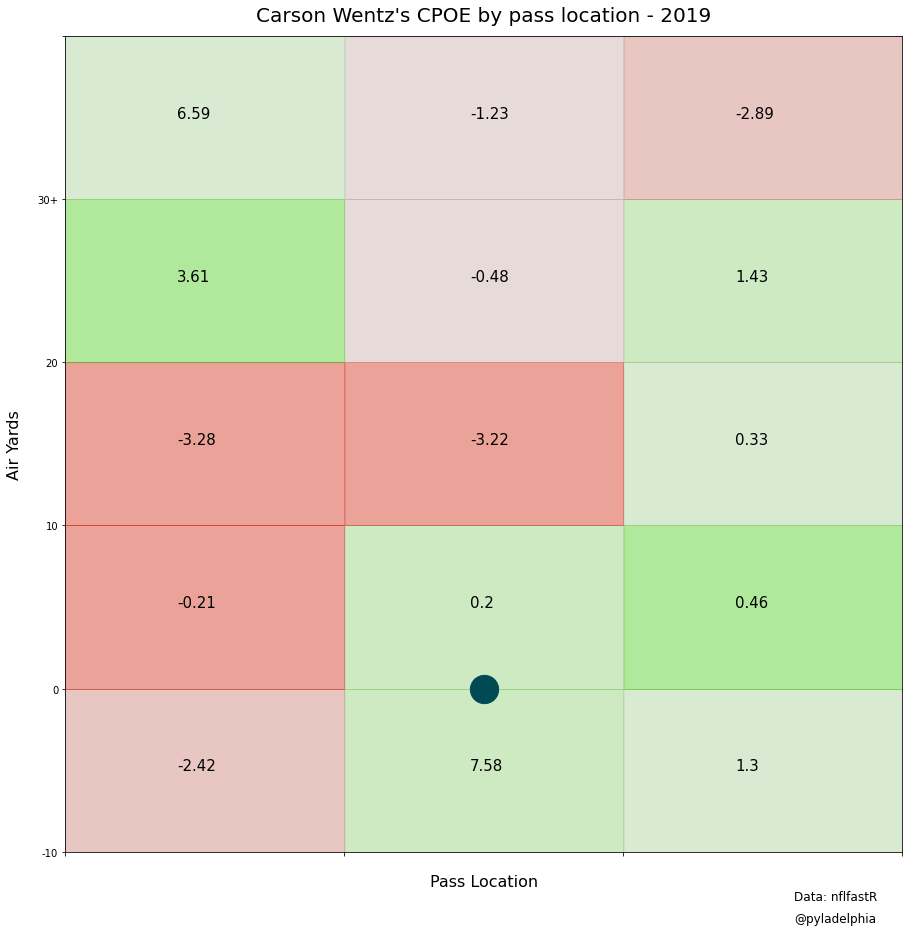

In [18]:

fig, ax = plt.subplots(figsize=(15,15))


#eleven = mpimg.imread(r'\Users\Usuario\Desktop\eleven.png')
#imagebox = OffsetImage(eleven, zoom=0.1)
#ab = AnnotationBbox(imagebox, (7.5, 0))
#ax.add_artist(ab)


ax.axvspan(0, 5, ymin=0, ymax=0.2, alpha=0.4,zorder = 1,  color= str(choose_color(0)))
ax.axvspan(0, 5, ymin=0.2, ymax=0.4, alpha=0.4,zorder = 1,  color= str(choose_color(1)))
ax.axvspan(0, 5, ymin=0.4, ymax=0.6, alpha=0.4,zorder = 1,  color=str(choose_color(2)))
ax.axvspan(0, 5, ymin=0.6, ymax=0.8, alpha=0.4,zorder = 1,  color=str(choose_color(3)))
ax.axvspan(0, 5, ymin=0.8, ymax=1, alpha=0.4,zorder = 1,  color=str(choose_color(4)))
ax.axvspan(5.01, 10, ymin=0, ymax=0.2, alpha=0.4,zorder = 1,  color=str(choose_color(5)))
ax.axvspan(5.01, 10, ymin=0.2, ymax=0.4, alpha=0.4,zorder = 1,  color=str(choose_color(6)))
ax.axvspan(5.01, 10, ymin=0.4, ymax=0.6, alpha=0.4,zorder = 1,  color=str(choose_color(7)))
ax.axvspan(5.01, 10, ymin=0.6, ymax=0.8, alpha=0.4,zorder = 1,  color=str(choose_color(8)))
ax.axvspan(5.01, 10, ymin=0.8, ymax=1, alpha=0.4,zorder = 1,  color=str(choose_color(9)))
ax.axvspan(10.01, 15, ymin=0, ymax=0.2, alpha=0.4,zorder = 1,  color=str(choose_color(10)))
ax.axvspan(10.01, 15, ymin=0.2, ymax=0.4, alpha=0.4,zorder = 1,  color=str(choose_color(11)))
ax.axvspan(10.01, 15, ymin=0.4, ymax=0.6, alpha=0.4, zorder = 1, color=str(choose_color(12)))
ax.axvspan(10.01, 15, ymin=0.6, ymax=0.8, alpha=0.4,zorder = 1,  color=str(choose_color(13)))
ax.axvspan(10.01, 15, ymin=0.8, ymax=1, alpha=0.4, zorder = 1, color=str(choose_color(14)))


ax.text(2,-5,str(wentz.mean_cpoe.iloc[0].round(2)),fontsize = 15)
ax.text(7.25,-5,str(wentz.mean_cpoe.iloc[5].round(2)),fontsize = 15)
ax.text(12,-5,str(wentz.mean_cpoe.iloc[10].round(2)),fontsize = 15)
ax.text(2,5,str(wentz.mean_cpoe.iloc[1].round(2)),fontsize = 15)
ax.text(7.25,5,str(wentz.mean_cpoe.iloc[6].round(2)),fontsize = 15)
ax.text(12,5,str(wentz.mean_cpoe.iloc[11].round(2)),fontsize = 15)
ax.text(2,15,str(wentz.mean_cpoe.iloc[2].round(2)),fontsize = 15)
ax.text(7.25,15,str(wentz.mean_cpoe.iloc[7].round(2)),fontsize = 15)
ax.text(12,15,str(wentz.mean_cpoe.iloc[12].round(2)),fontsize = 15)
ax.text(2,25,str(wentz.mean_cpoe.iloc[3].round(2)),fontsize = 15)
ax.text(7.25,25,str(wentz.mean_cpoe.iloc[8].round(2)),fontsize = 15)
ax.text(12,25,str(wentz.mean_cpoe.iloc[13].round(2)),fontsize = 15)
ax.text(2,35,str(wentz.mean_cpoe.iloc[4].round(2)),fontsize = 15)
ax.text(7.25,35,str(wentz.mean_cpoe.iloc[9].round(2)),fontsize = 15)
ax.text(12,35,str(wentz.mean_cpoe.iloc[14].round(2)),fontsize = 15)



#to change x-axis labels
x = [0,5,10,15]
pass_location = ['','','','']
ax.set_xticks(x)
ax.set_xticklabels(pass_location)
    
labels_air_yards = ['-10','0','10','20','30+']
ax.set_yticklabels(labels_air_yards)
ax.set_ylim(bottom = -10, top= 40)
ax.set_xlim(left = 0, right = 15)
#Add grid
ax.grid(zorder=0,alpha=.35)
ax.set_axisbelow(True)

#quarterback point
ax.scatter(7.5,0,s = 800, color = '#014A53', alpha = 1, zorder = 3)

#Add title, labels, and source
ax.set_title("Carson Wentz's CPOE by pass location - 2019",fontsize=20,pad=15)
ax.set_xlabel('Pass Location',fontsize=16,labelpad=15)
ax.set_ylabel('Air Yards',fontsize=16,labelpad=15)
plt.figtext(.8,.06, '@pyladelphia', fontsize = 12)
plt.figtext(.8,.08,'Data: nflfastR',fontsize=12)


plt.show()